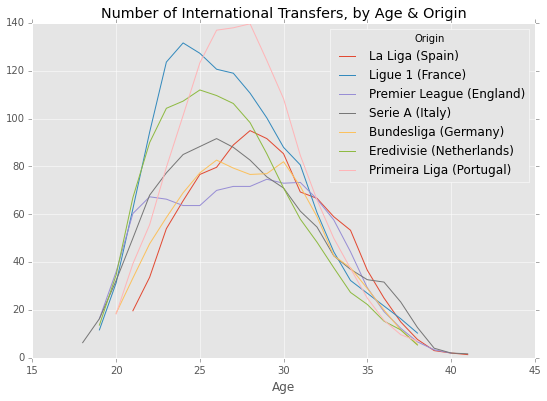

In [77]:
nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['fromLeague'].isin(['GB1','ES1','L1','IT1','FR1','NL1','PO1']))] \
    .rename(columns={'fromLeague':'Origin'}).groupby(['Age','Origin'])['id'].count().unstack() \
    .rolling(window=3,center=False).mean().rename(columns=leagueCodeMapping).plot.line(figsize=(9,6),xlim=(15,45),title='Number of International Transfers, by Age & Origin')

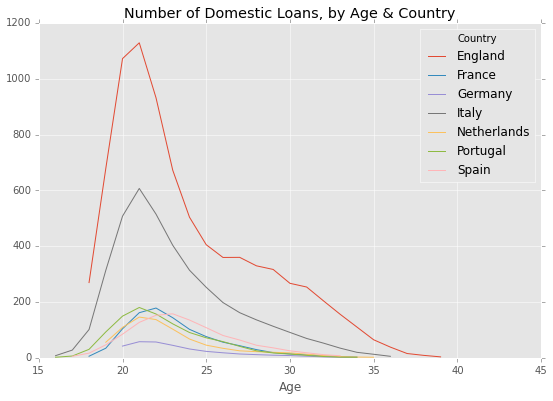

In [125]:
loans[(loans['toCountry']==loans['fromCountry'])&(loans['fromCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['Age','Country'])['id'].count().unstack() \
    .rolling(window=3,center=False).mean().plot.line(figsize=(9,6),xlim=(15,45),title='Number of Domestic Loans, by Age & Country')

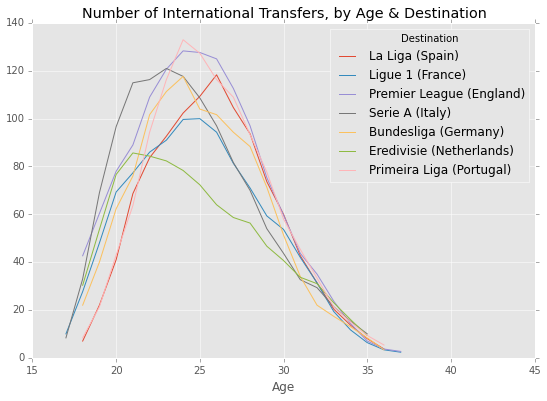

In [81]:
nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['toLeague'].isin(['GB1','ES1','L1','IT1','FR1','NL1','PO1']))] \
    .rename(columns={'toLeague':'Destination'}).groupby(['Age','Destination'])['id'].count().unstack() \
    .rolling(window=3,center=False).mean().rename(columns=leagueCodeMapping).plot.line(figsize=(9,6),xlim=(15,45),title='Number of International Transfers, by Age & Destination')

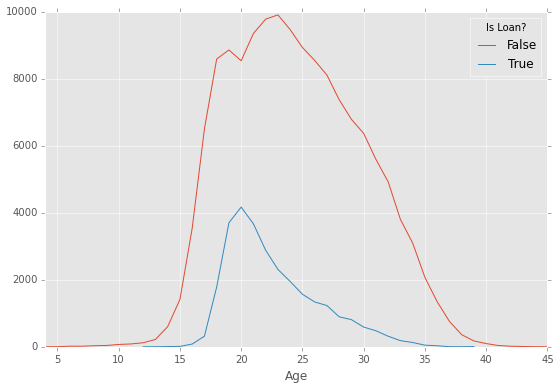

In [113]:
transfers.rename(columns={'isLoan':'Is Loan?'}).groupby(['Age','Is Loan?'])['id'].count().unstack() \
    .rolling(window=1,center=False).mean().rename(columns=leagueCodeMapping).plot.line(figsize=(9,6))

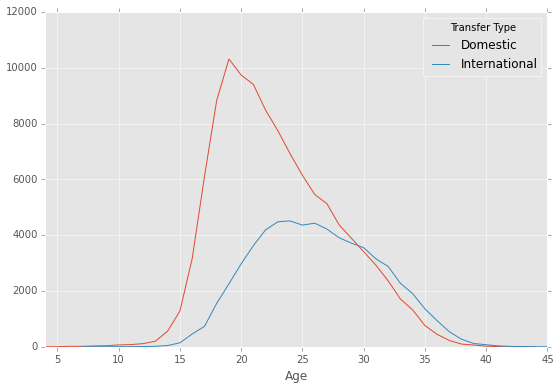

In [109]:
transfers.join(pd.Series(np.where(transfers['fromCountry']==transfers['toCountry'],'Domestic','International')).rename('Transfer Type'))\
    .groupby(['Age','Transfer Type'])['id'].count().unstack().plot.line(figsize=(9,6),title='')

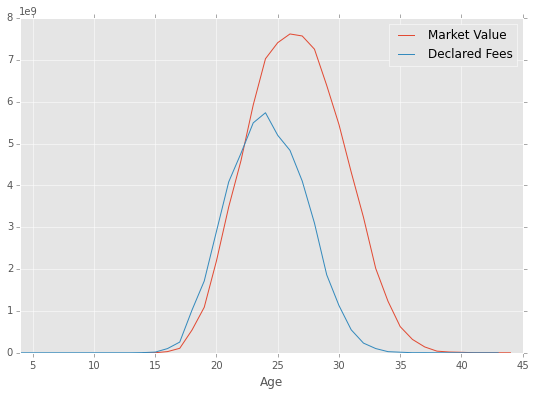

In [107]:
nonloans.groupby('Age')['mv','feeValue'].sum().rename(columns={'mv':'Market Value','feeValue':'Declared Fees'}).plot.line(figsize=(9,6))

In [5]:
leagueCodeMapping = {'GB1':'Premier League (England)','FR1':'Ligue 1 (France)',
                                                         'ES1':'La Liga (Spain)','IT1':'Serie A (Italy)','L1':'Bundesliga (Germany)',
                                                         'PO1':'Primeira Liga (Portugal)','NL1':'Eredivisie (Netherlands)'}

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from urllib2 import urlopen, Request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import os.path 
import datetime 
import math

transfers = pd.read_csv('../data/merged/transfers.csv')
loans=transfers[transfers['isLoan']]
nonloans=transfers[~transfers['isLoan']]
players=pd.read_csv('../data/merged/players.csv')